<a href="https://colab.research.google.com/github/fbtkdqo/2020-2-AI/blob/master/code/04_mnist_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST 형태를 알아 봅시다. 데이터 수, 행렬 형태 등
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# MNIST 훈련 데이터의 내부 첫 내용도 알아보자.
print(x_train[0])
print(y_train[0])

# MNIST 테스트 데이터의 내부 첫 내용도 알아보자.
print(x_test[0])
print(y_test[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

In [9]:
import sys

for x in x_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

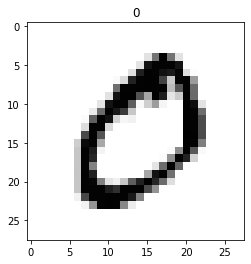

In [33]:
import matplotlib.pyplot as plt

n = 1
ttl = str(y_train[n])
plt.figure(figsize=(6, 4))
plt.title(ttl)
plt.imshow(x_train[n], cmap='Greys')

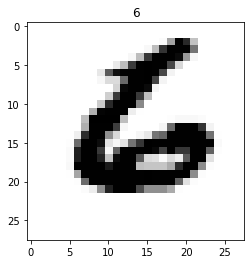

In [11]:
n = len(y_test)-1
ttl = str(y_test[n])
plt.figure(figsize=(6, 4))
plt.title(ttl)
plt.imshow(x_test[n], cmap='Greys')

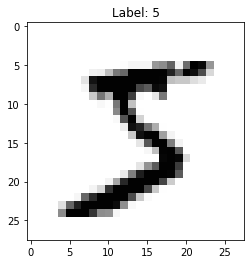

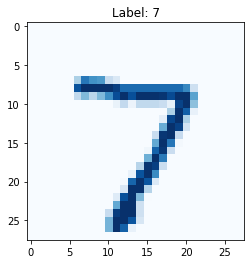

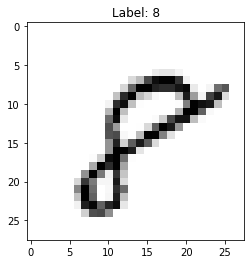

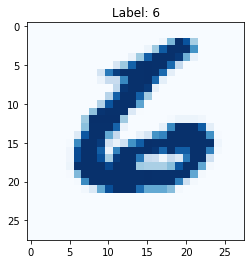

In [12]:
import matplotlib.pyplot as plt

tmp = "Label: " + str(y_train[0])
plt.title(tmp)
plt.imshow(x_train[0], cmap="Greys")
plt.show()

tmp = "Label: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0], cmap='Blues')
plt.show()

# MNIST 데이터(훈련, 테스트)의 내부 마지막 내용을 그려보자.
idx = len(x_train) - 1
tmp = "Label: " + str(y_train[idx])
plt.title(tmp)
plt.imshow(x_train[idx], cmap="Greys")
plt.show()

idx = len(x_test) - 1
tmp = "Label: " + str(y_test[idx])
plt.title(tmp)
plt.imshow(x_test[idx], cmap='Blues')
plt.show()

In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from random import sample
nrows, ncols = 4, 5 #출력 가로 세로 수
# 출력할 첨자 선정
idx = sorted(sample(range(len(x_train)), nrows * ncols)) 
print(idx)

[2139, 2515, 4271, 4715, 5987, 6630, 7284, 13814, 15146, 15252, 20430, 20732, 21695, 23175, 34579, 36547, 39051, 47380, 53298, 54317]


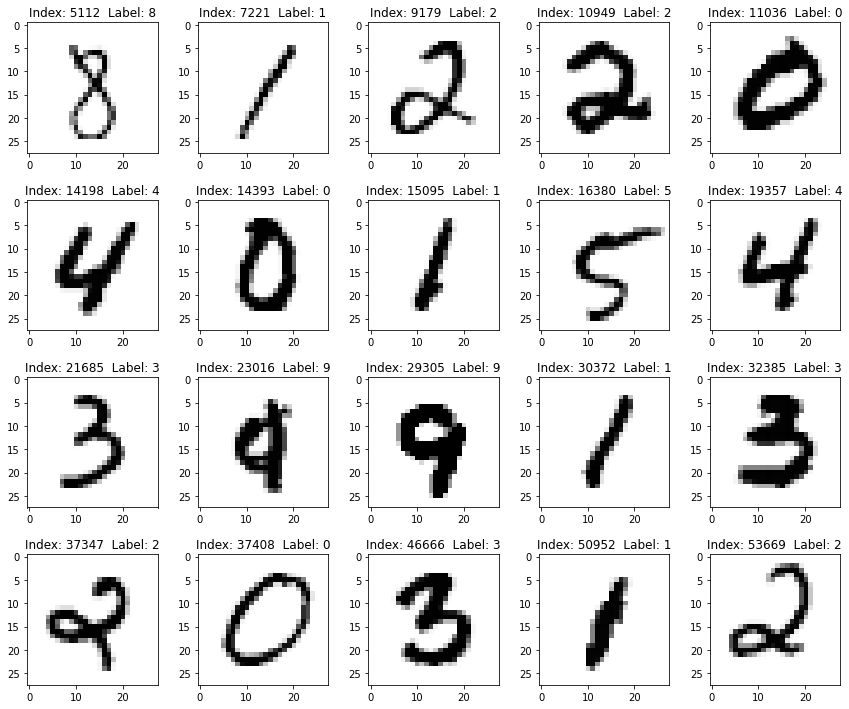

In [14]:
from random import sample

nrows, ncols = 4, 5 #출력 가로 세로 수
idx = sorted(sample(range(len(x_train)), nrows * ncols)) # 출력할 첨자 선정
#print(idx)

count = 0
plt.figure(figsize=(12, 10))

for n in idx:
    count += 1
    plt.subplot(nrows, ncols, count)
    tmp = "Index: " + str(n) + "  Label: " + str(y_train[n])
    plt.title(tmp)
    plt.imshow(x_train[n], cmap='Greys')

plt.tight_layout()
plt.show()

In [15]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              # metrics=['accuracy', 'mse'])

# 모델 요약 표시
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1451 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1077 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9761


In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9775


[0.07558738440275192, 0.9775000214576721]

In [21]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 층을 차례대로 쌓아 tf.keras.models.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 요약 표시
model.summary()

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 모델에 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              # metrics=['accuracy', 'mse'])

# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=5)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1462 - accuracy: 0.9564
Epoch 3/5
1875/1875 [=======================

[0.07871617376804352, 0.9765999913215637]

In [27]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 먼저 reshape()로 평탄화 작업을 수행한 후
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

# 층을 차례대로 쌓아 tf.keras.models.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 요약 표시
model.summary()

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 모델에 설정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              # metrics=['accuracy', 'mse'])

# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=5)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1410 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1067 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 

[0.07378561049699783, 0.9789999723434448]

In [24]:
print(x_test[:1].shape)

pred_result = model.predict(x_test[:1])
print(pred_result.shape)
print(pred_result)
print(pred_result[0])

(1, 784)
(1, 10)
[[2.2917313e-06 2.9776572e-08 2.3109316e-05 1.2672906e-04 7.1714128e-11
  3.8203989e-08 1.1218516e-12 9.9984372e-01 2.7544054e-06 1.2473670e-06]]
[2.2917313e-06 2.9776572e-08 2.3109316e-05 1.2672906e-04 7.1714128e-11
 3.8203989e-08 1.1218516e-12 9.9984372e-01 2.7544054e-06 1.2473670e-06]


0.99999994
7


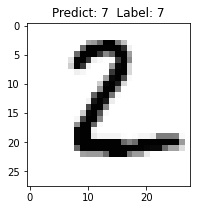

In [34]:
import numpy as np

# 10 개의 수를 더하면?
one_pred = pred_result[0]
print(one_pred.sum())

# 혹시 가장 큰 수가 있는 첨자가 결과
one = np.argmax(one_pred)
print(one)

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
tmp = "Predict: " + str(one) + "  Label: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[n], cmap='Greys')

In [ ]:
import numpy as np

###############################################
# 원핫 인코딩과 argmax 학습
print(np.argmax([5, 4, 10, 1, 2]))
print(np.argmax([3, 1, 4, 9, 6, 7, 2]))
print(np.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

2
3
[1 0 2]


In [ ]:
# 간단한 자료 처리
import numpy as np

x = np.array([2, 3, 254, 5, 6, 3])
x = x / 255.0
print(x)

x = x.reshape(2, 3)
print(x)

x = x.flatten()
print(x)

[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]
[[0.00784314 0.01176471 0.99607843]
 [0.01960784 0.02352941 0.01176471]]
[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]


In [ ]:
from random import sample
import numpy as np

# x_test로 직접 결과 처리
pred_result = model.predict(x_test)
print(pred_result.shape)
print(pred_result[0])
print(np.argmax(pred_result[0]))

#%%
# 원핫 인토딩을 일반 데이터로 변환
pred_labels = np.argmax(pred_result, axis=1)
# 예측한 답 출력
print(pred_labels)
# 실제 정답 출력
print(y_test)

(10000, 10)
[5.7719753e-08 4.8566982e-09 3.6818421e-06 3.6138346e-05 4.7529820e-11
 4.0467949e-08 8.8564903e-13 9.9995899e-01 1.6672244e-07 1.0464310e-06]
7
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


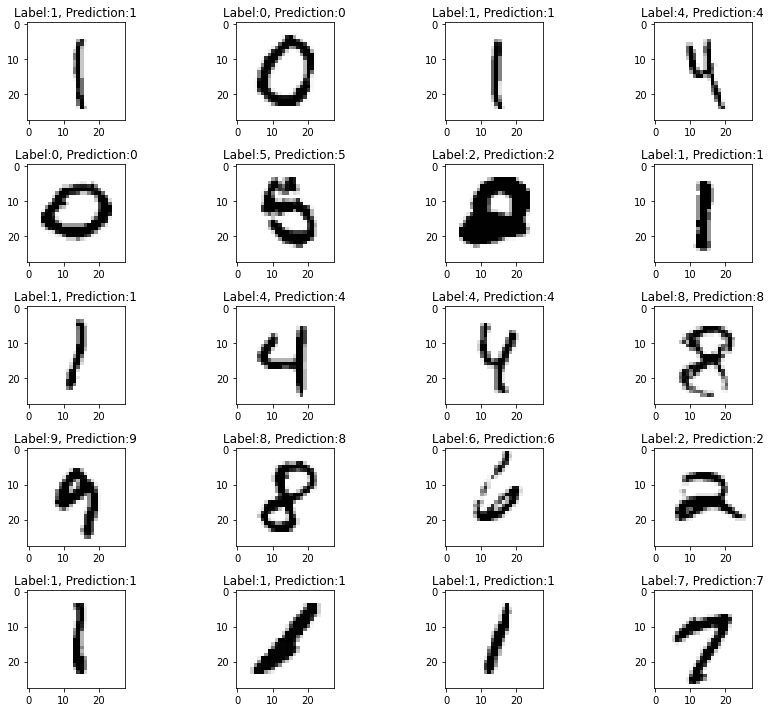

In [ ]:
from random import sample
import numpy as np

# 예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

# 실제 예측한 정답이 있는 리스트 pred_labels
pred_labels = np.argmax(pred_result, axis=1)

#랜덤하게 20개의 훈련용 자료를 예측 값과 정답, 그림을 그려 보자.
nrows, ncols = 5, 4
samples = sorted(sample(range(len(x_test)), nrows * ncols)) # 출력할 첨자 선정

# 임의의 20개 그리기
count = 0
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    # 예측이 틀린 것은 파란색으로 그리기 
    cmap = 'Greys' if ( pred_labels[n] == y_test[n]) else 'Blues'
    plt.imshow(x_test[n].reshape(28, 28), cmap=cmap, interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

정답이 틀린 수 232
[8520, 290, 381, 1709, 9019, 2272, 1299, 1044, 3117, 4140, 340, 659, 3597, 1911, 1530, 3073, 4814, 2447, 4731, 1226]


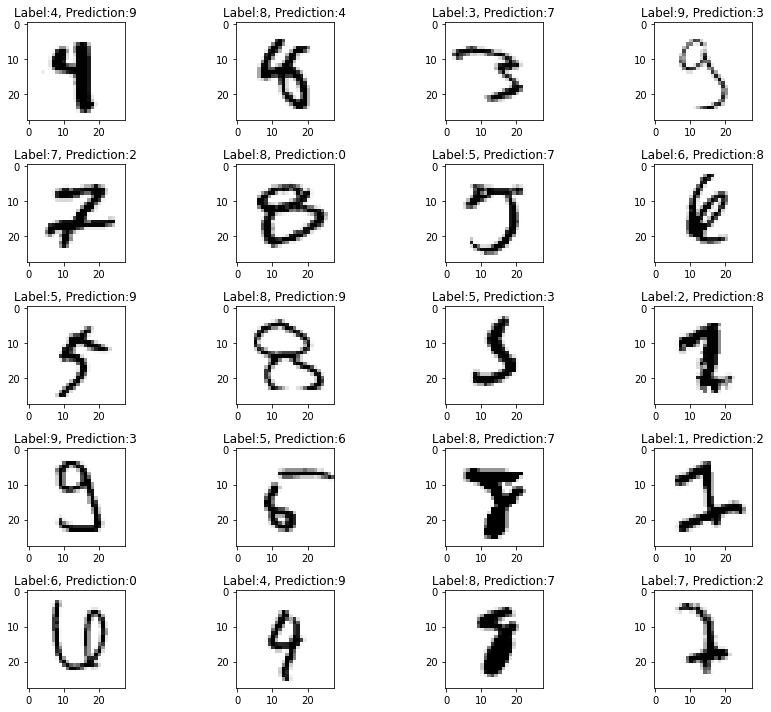

In [ ]:
from random import sample
import numpy as np

# 예측 틀린 것 첨자를 저장할 리스트
mispred = []
# 예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

# 실제 예측한 정답이 있는 리스트 pred_labels
pred_labels = np.argmax(pred_result, axis=1)

for n in range(0, len(y_test)):
    if pred_labels[n] != y_test[n]:
        mispred.append(n)
print('정답이 틀린 수', len(mispred))

# 랜덤하게 틀린 것 20개의 첨자 리스트 생성
samples = sample(mispred, 20)
print(samples)

# 틀린 것 20개 그리기
count = 0
nrows, ncols = 5, 4
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf

# mnist 모듈 준비
mnist = tf.keras.datasets.mnist

# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0


# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')                                     
])

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 표시
model.summary()

# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=10)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2889 - accuracy: 0.9155
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1408 - accuracy: 0.9575
Epoch 3/10
1875/1875 [====================

[0.07018734514713287, 0.9800999760627747]

In [ ]:
import tensorflow as tf

# mnist 모듈 준비
mnist = tf.keras.datasets.mnist

# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0


# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')                                     
])

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 표시
model.summary()

# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=20)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

[0.0860566645860672, 0.9789000153541565]